## Encontre a bandeira

Você consegue adivinhar de qual continente esta bandeira vem?

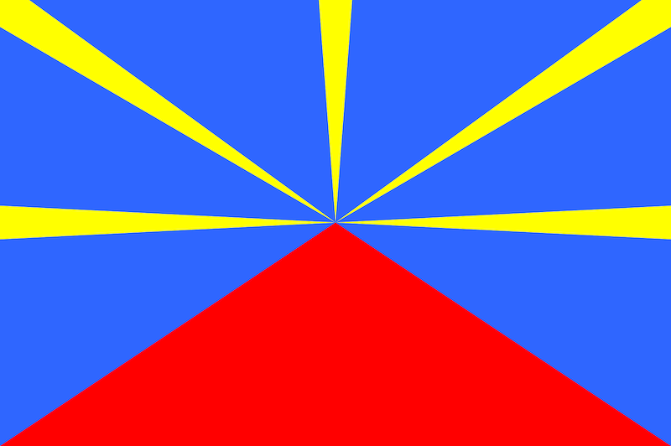

In [336]:
from IPython.display import Image
Image('bandeira exercício.png')

Quais variáveis indicariam? Talvez algumas das cores sejam bons indicadores. A presença ou ausência de certas formas pode dar uma dica. Neste projeto, usaremos árvores de decisão para tentar prever o continente de bandeiras com base em vários desses recursos.

O conjunto de dados original está disponível no repositório de aprendizado de máquina UCI:

https://archive.ics.uci.edu/ml/datasets/Flags

In [337]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [338]:
cols = ['nome','continente','zone', 'area', 'população', 'idioma','religião','barras','listras','cores',
'vermelho','verde','azul','dourado','branco','preto','laranja','cor_predominante','círculos',
'cruzamentos','cruzes','quarters','sol_estrelas','crescent','triangle','icon','animate','text','topleft','botright']

df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

O conjunto de dados foi carregado e salvo em um dataframe chamado df. Alguns dos recursos de entrada e saída de interesse são:

- `nome`: Nome do país em questão.
- `continente` : 1=América do Norte, 2=América do Sul, 3=Europa, 4=África, 5=Ásia, 6=Oceania
- `barras`: Número de barras verticais na bandeira
- `listras` : Número de listras horizontais na bandeira
- `cores` : Número de cores diferentes na bandeira
- `vermelho` : 0 se vermelho ausente, 1 se vermelho presente na bandeira
...
- `cor_predominante` :  cor predominante na bandeira
- `círculos` : número de círculos na bandeira
- `cruzamentos` : Número de cruzamentos (na vertical)
- `cruzes` : número de cruzes diagonais
- `sol_estrelas` : Número de símbolos de sol ou estrela

**1.** Construiremos um classificador de árvore de decisão para prever de que continente vem uma determinada bandeira. Antes disso, queremos entender a distribuição das bandeiras por continente. Calcule a quantidade de países por  continente.

In [339]:
print(f'Continente 1: {len(df[df["continente"] == 1])}')
print(f'Continente 2: {len(df[df["continente"] == 2])}')
print(f'Continente 3: {len(df[df["continente"] == 3])}')
print(f'Continente 4: {len(df[df["continente"] == 4])}')
print(f'Continente 5: {len(df[df["continente"] == 5])}')
print(f'Continente 6: {len(df[df["continente"] == 6])}')
print(f'Total: {len(df)}')


Continente 1: 31
Continente 2: 17
Continente 3: 35
Continente 4: 52
Continente 5: 39
Continente 6: 20
Total: 194


**2.** Em vez de olhar para todos os seis continentes, vamos nos concentrar em apenas dois, Europa e Oceania. Crie um novo dataframe apenas com bandeiras da Europa e Oceania.

In [340]:
df_europa = df[df['continente'] == 4]
df_oceania = df[df['continente'] == 6]
df_europa_e_oceania = pd.concat([df_europa, df_oceania])

df_europa_e_oceania.head()

,nome,continente,zone,area,população,idioma,religião,barras,listras,cores,...,cruzes,quarters,sol_estrelas,crescent,triangle,icon,animate,text,topleft,botright
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
18,Benin,4,1,113,3,3,5,0,0,2,...,0,0,1,0,0,0,0,0,green,green
22,Botswana,4,2,600,1,10,5,0,5,3,...,0,0,0,0,0,0,0,0,blue,blue
27,Burkina,4,4,274,7,3,5,0,2,3,...,0,0,1,0,0,0,0,0,red,green


**3.** Não usaremos todos os recursos disponíveis pois não são relevantes para classificação e/ou deixariam a árvore de decisão com muito profundidade. Crie um novo dataframe, chamado `x`, com somente as seguintes variáveis preditoras:

- `barras`
- `listras`
- `vermelho`
- `verde`
- `azul`
- `dourado`
- `branco`
- `preto`
- `laranja`
- `cor_predominante`
- `círculos`
- `cruzamentos`
- `cruzes`
- `quarters`
- `sol_estrelas`
- `triangle`
- `animate`

In [341]:
x = df_europa_e_oceania[[
  'barras', 
  'listras', 
  'vermelho', 
  'verde', 
  'azul', 
  'dourado', 
  'branco', 
  'preto', 
  'laranja',
  'cor_predominante',
  'círculos',
  'cruzamentos',
  'cruzes',
  'quarters',
  'sol_estrelas',
  'triangle',
  'animate'
]]

**4.** Construiremos um classificador para distinguir bandeiras para esses dois continentes – mas primeiro, imprima os tipos de dados das variáveis preditoras.

In [342]:
x.dtypes

barras               int64
listras              int64
vermelho             int64
verde                int64
azul                 int64
dourado              int64
branco               int64
preto                int64
laranja              int64
cor_predominante    object
círculos             int64
cruzamentos          int64
cruzes               int64
quarters             int64
sol_estrelas         int64
triangle             int64
animate              int64
dtype: object

**5.** Observe que todas as variáveis de previsão são numéricas, exceto `cor_predominante`. Transforme o conjunto de dados de variáveis preditoras em variáveis fictícias usando a função do pandas `get_dummies`.

In [343]:
x = pd.get_dummies(x, columns=['cor_predominante'])
x.head()

,barras,listras,vermelho,verde,azul,dourado,branco,preto,laranja,círculos,...,sol_estrelas,triangle,animate,cor_predominante_black,cor_predominante_blue,cor_predominante_gold,cor_predominante_green,cor_predominante_orange,cor_predominante_red,cor_predominante_white
2,2,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,0,2,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
18,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
22,0,5,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
27,0,2,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


**6.** Armazene os dados do atributo de saída na variável `y` 

In [344]:
y = df_europa_e_oceania['continente']

**7.** Divida os dados em conjuntos de treino e teste.

In [345]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

### Ajustar classificadores de árvore de decisão por profundidade

**8.** Ajuste o modelo de árvore de decisão testando o desempenho em uma faixa de valores de profundidade máxima. Ajuste um classificador de árvore de decisão para valores de `max_depth` de 1 a 20. Salve a pontuação de acurácia para cada profundidade na lista `profundidade`

In [346]:
predictions = []

for i in range(1, 21):
  model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
  model.fit(x_train, y_train)
  model.predict(x_test)
  score = model.score(x_test, y_test)
  predictions.append({'score': score, 'max_depth': i, 'model': model})

**9.** Plote a acurácia dos modelos de árvore de decisão versus o `max_depth`.

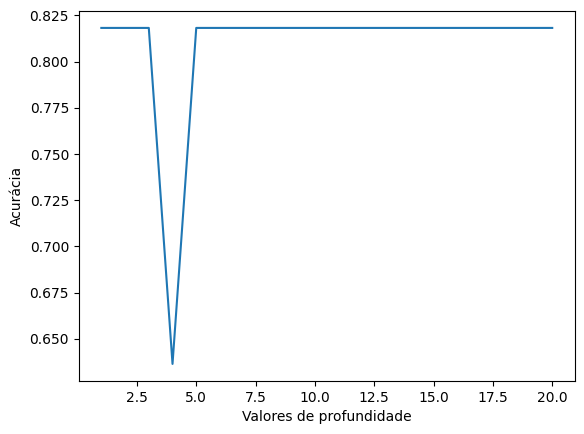

In [347]:
plt.plot(
  list(map(lambda prediction: prediction['max_depth'], predictions)),
  list(map(lambda prediction: prediction['score'], predictions))
)
plt.xlabel('Valores de profundidade')
plt.ylabel('Acurácia')
plt.show()

**10.** Imprima a acurácia e profundidade do modelo com a maior precisão.

In [348]:
max_model = {
  'k': 0,
  'score': 0,
  'model': None
}

for prediction in predictions:
  if prediction['score'] > max_model['score']:
    max_model = prediction

print(f'Modelo mais preciso encontrado: {max_model["max_depth"]}, com resultado: {max_model["score"]}')

Modelo mais preciso encontrado: 1, com resultado: 0.8181818181818182


**11.** Reajuste o modelo de árvore de decisão usando o `max_depth` que obteve a maior acurácia; Mostre a árvore de decisão resultante.

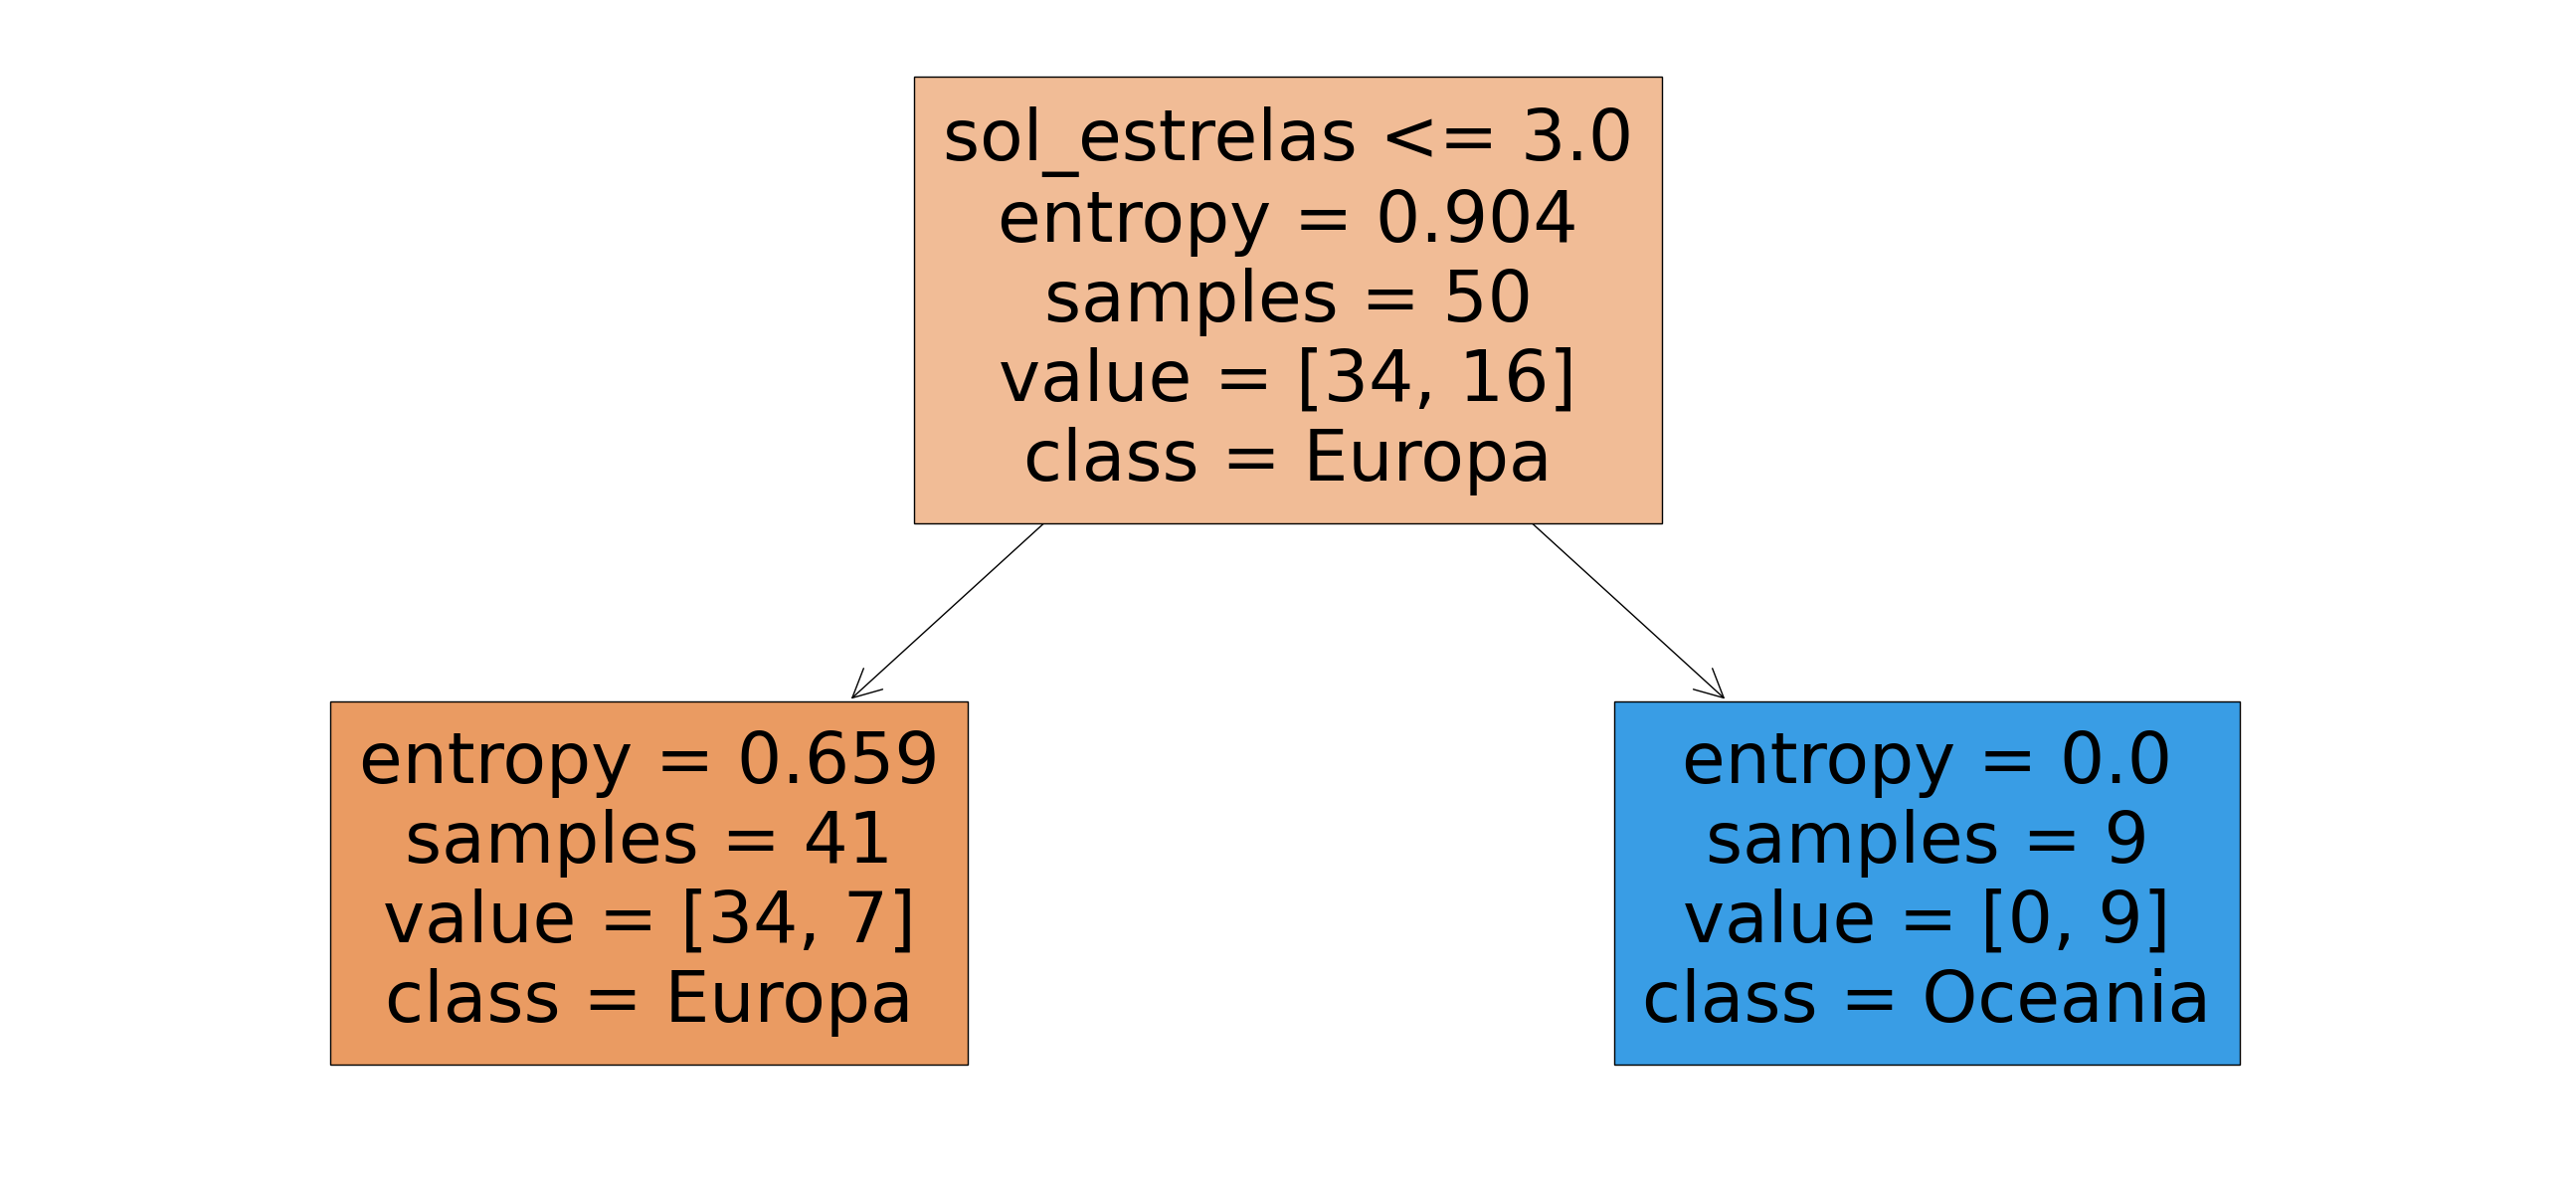

In [349]:
plt.figure(figsize=(26, 12))
tree.plot_tree(max_model['model'], feature_names=x_train.columns, class_names=['Europa', 'Oceania'], label='all', filled=True)
plt.tight_layout()
plt.show()

**12.** Existem algumas maneiras diferentes de estender este projeto. Tente classificar outra coisa! Por exemplo, em vez de prever o `continente`, poderia prever algo como o `idioma`.

Ajuste mais parâmetros do modelo. Você pode encontrar uma descrição de todos os parâmetros que podem ser ajustados na [documentação do Classificador de Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Por exemplo, veja o que acontece se você ajustar o `max_leaf_nodes`. Pense se você estaria superajustando ou subajustando os dados com base em quantos nós folha você permite.

In [350]:
# Prevendo o idioma
df_ingles = df[df['idioma'] == 1]
df_espanhol = df[df['idioma'] == 2]
df_ingles_e_espanhol = pd.concat([df_ingles, df_espanhol])

x = df_ingles_e_espanhol[[
  'barras', 
  'listras', 
  'vermelho', 
  'verde', 
  'azul', 
  'dourado', 
  'branco', 
  'preto', 
  'laranja',
  'cor_predominante',
  'círculos',
  'cruzamentos',
  'cruzes',
  'quarters',
  'sol_estrelas',
  'triangle',
  'animate'
]]

x = pd.get_dummies(x, columns=['cor_predominante'])
y = df_ingles_e_espanhol['idioma']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [351]:
predictions = []

for i in range(1, 21):
  model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
  model.fit(x_train, y_train)
  model.predict(x_test)
  score = model.score(x_test, y_test)
  predictions.append({'score': score, 'max_depth': i, 'model': model})

In [352]:
max_model = {
  'k': 0,
  'score': 0,
  'model': None
}

for prediction in predictions:
  if prediction['score'] > max_model['score']:
    max_model = prediction

print(f'Modelo mais preciso encontrado: {max_model["max_depth"]}, com resultado: {max_model["score"]}')

Modelo mais preciso encontrado: 2, com resultado: 0.9


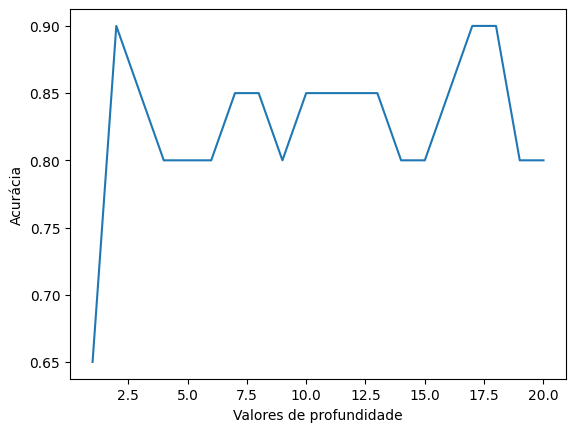

In [353]:
plt.plot(
  list(map(lambda prediction: prediction['max_depth'], predictions)),
  list(map(lambda prediction: prediction['score'], predictions))
)
plt.xlabel('Valores de profundidade')
plt.ylabel('Acurácia')
plt.show()

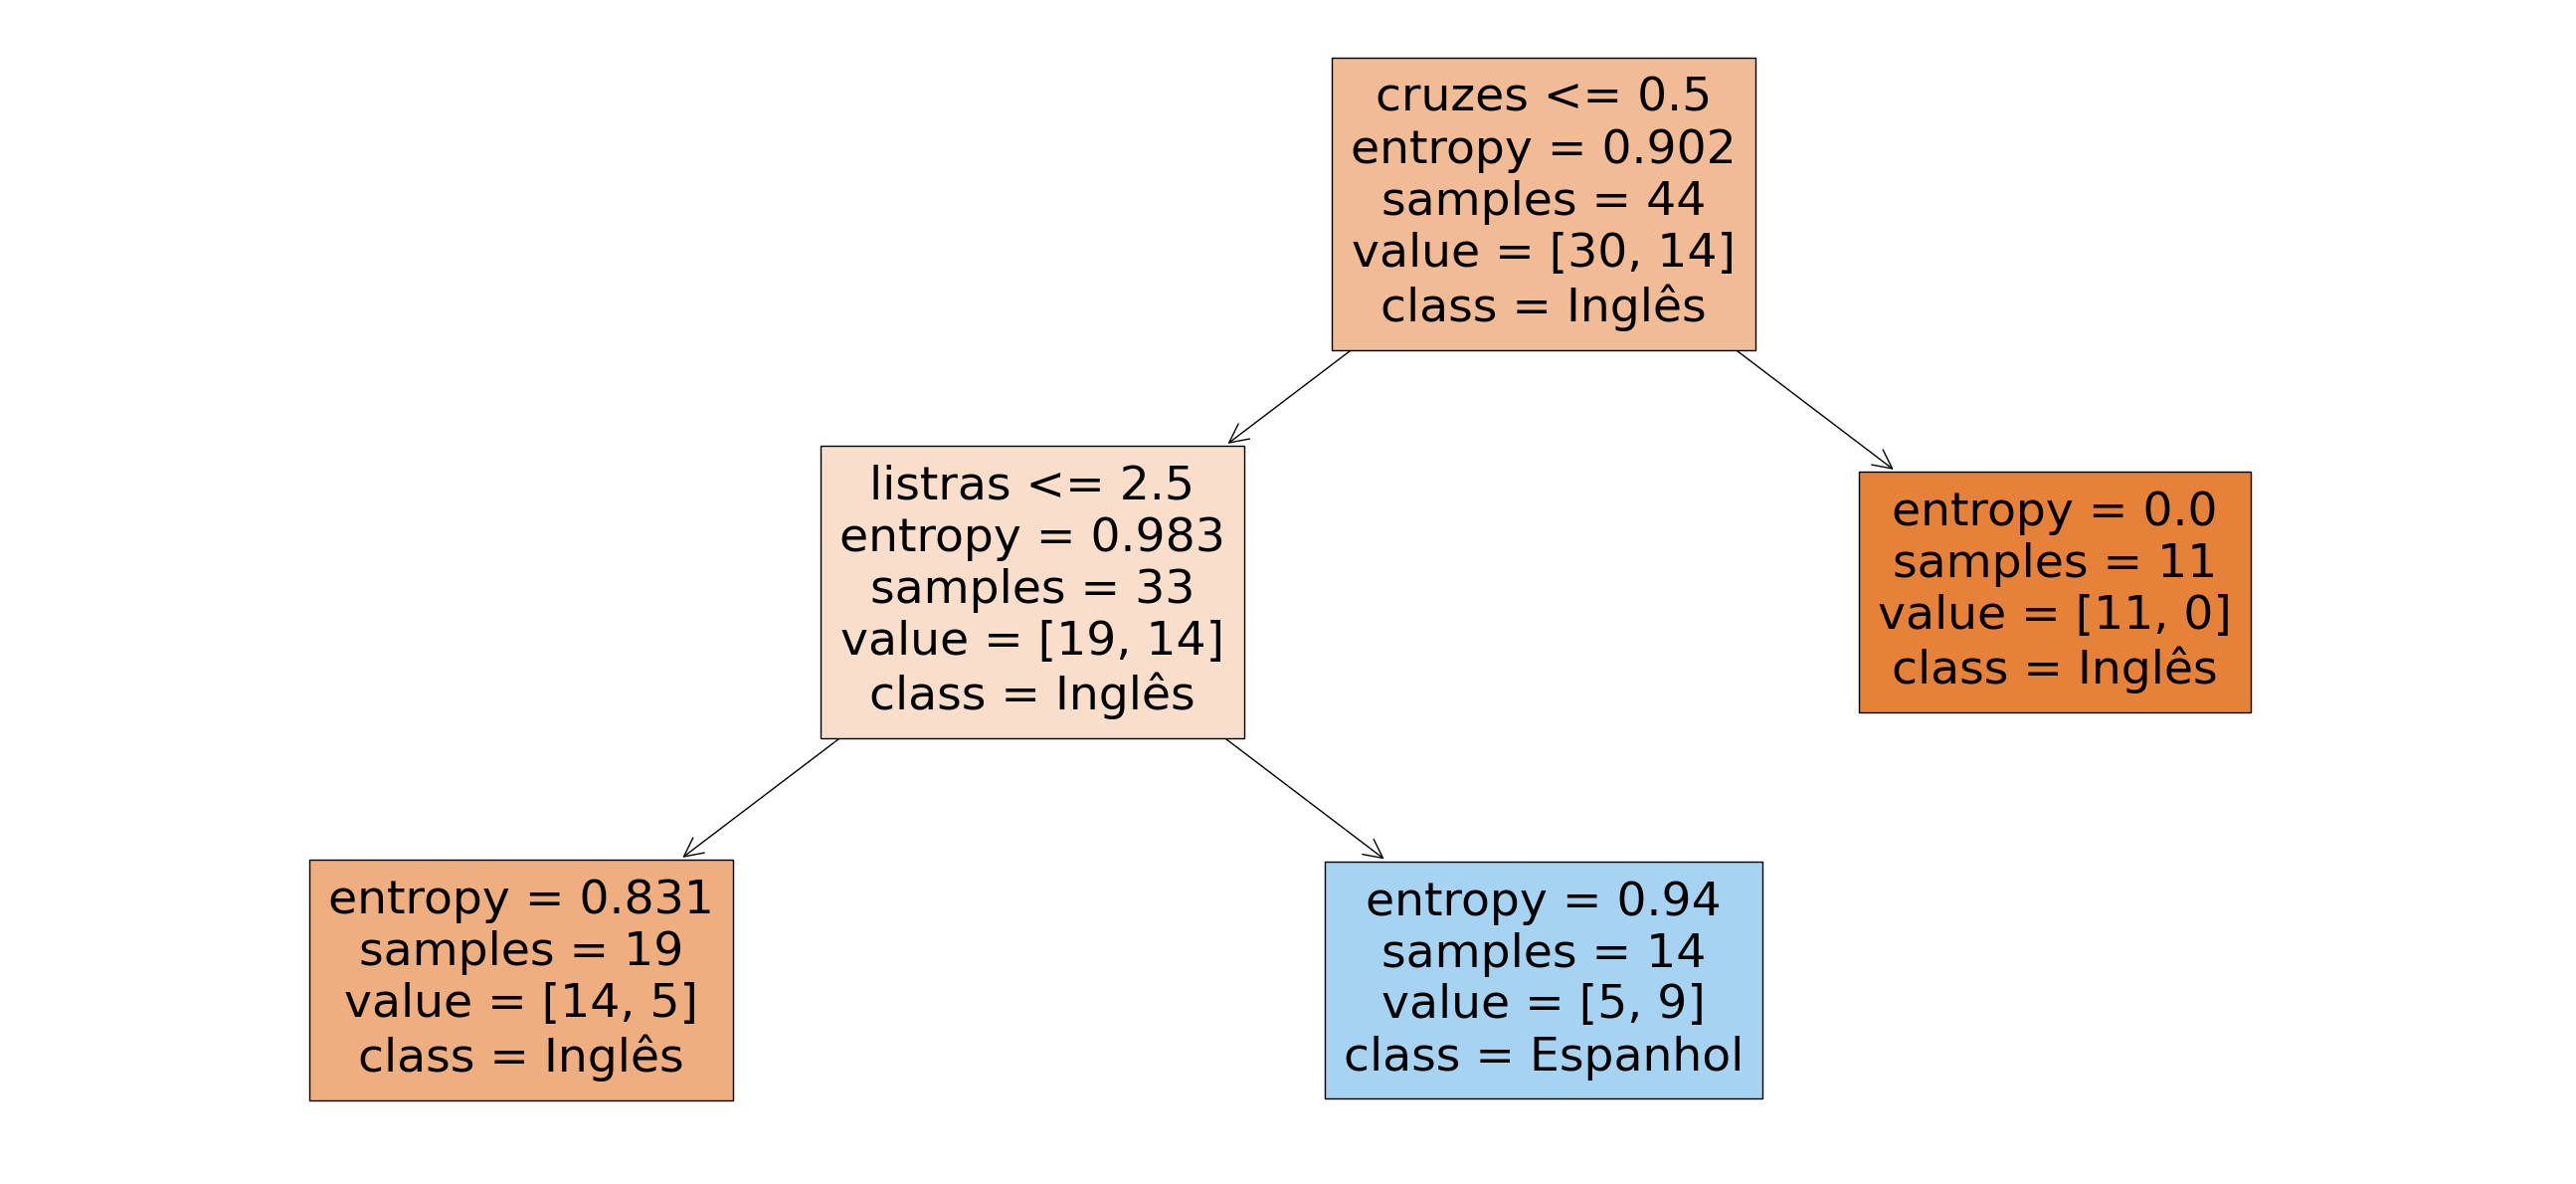

In [355]:
plt.figure(figsize=(26, 12))
tree.plot_tree(max_model['model'], feature_names=x_train.columns, class_names=['Inglês', 'Espanhol'], label='all', filled=True)
plt.tight_layout()
plt.show()